## Wykresy

In [70]:
library(psych)
library(caret)
library(klaR)
library(MASS)
library(mda)

In [129]:
Dane<- read.csv(file.choose())

In [130]:
Dane <- Dane[,c(1:6,13)]
Dane[,7] <- as.factor(Dane[,7])

In [131]:
head(Dane)

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63.02782,22.552586,39.60912,40.47523,98.67292,-0.254400,Abnormal
2,39.05695,10.060991,25.01538,28.99596,114.40543,4.564259,Abnormal
3,68.83202,22.218482,50.09219,46.61354,105.98514,-3.530317,Abnormal
4,69.29701,24.652878,44.31124,44.64413,101.86850,11.211523,Abnormal
5,49.71286,9.652075,28.31741,40.06078,108.16872,7.918501,Abnormal
6,40.25020,13.921907,25.12495,26.32829,130.32787,2.230652,Abnormal


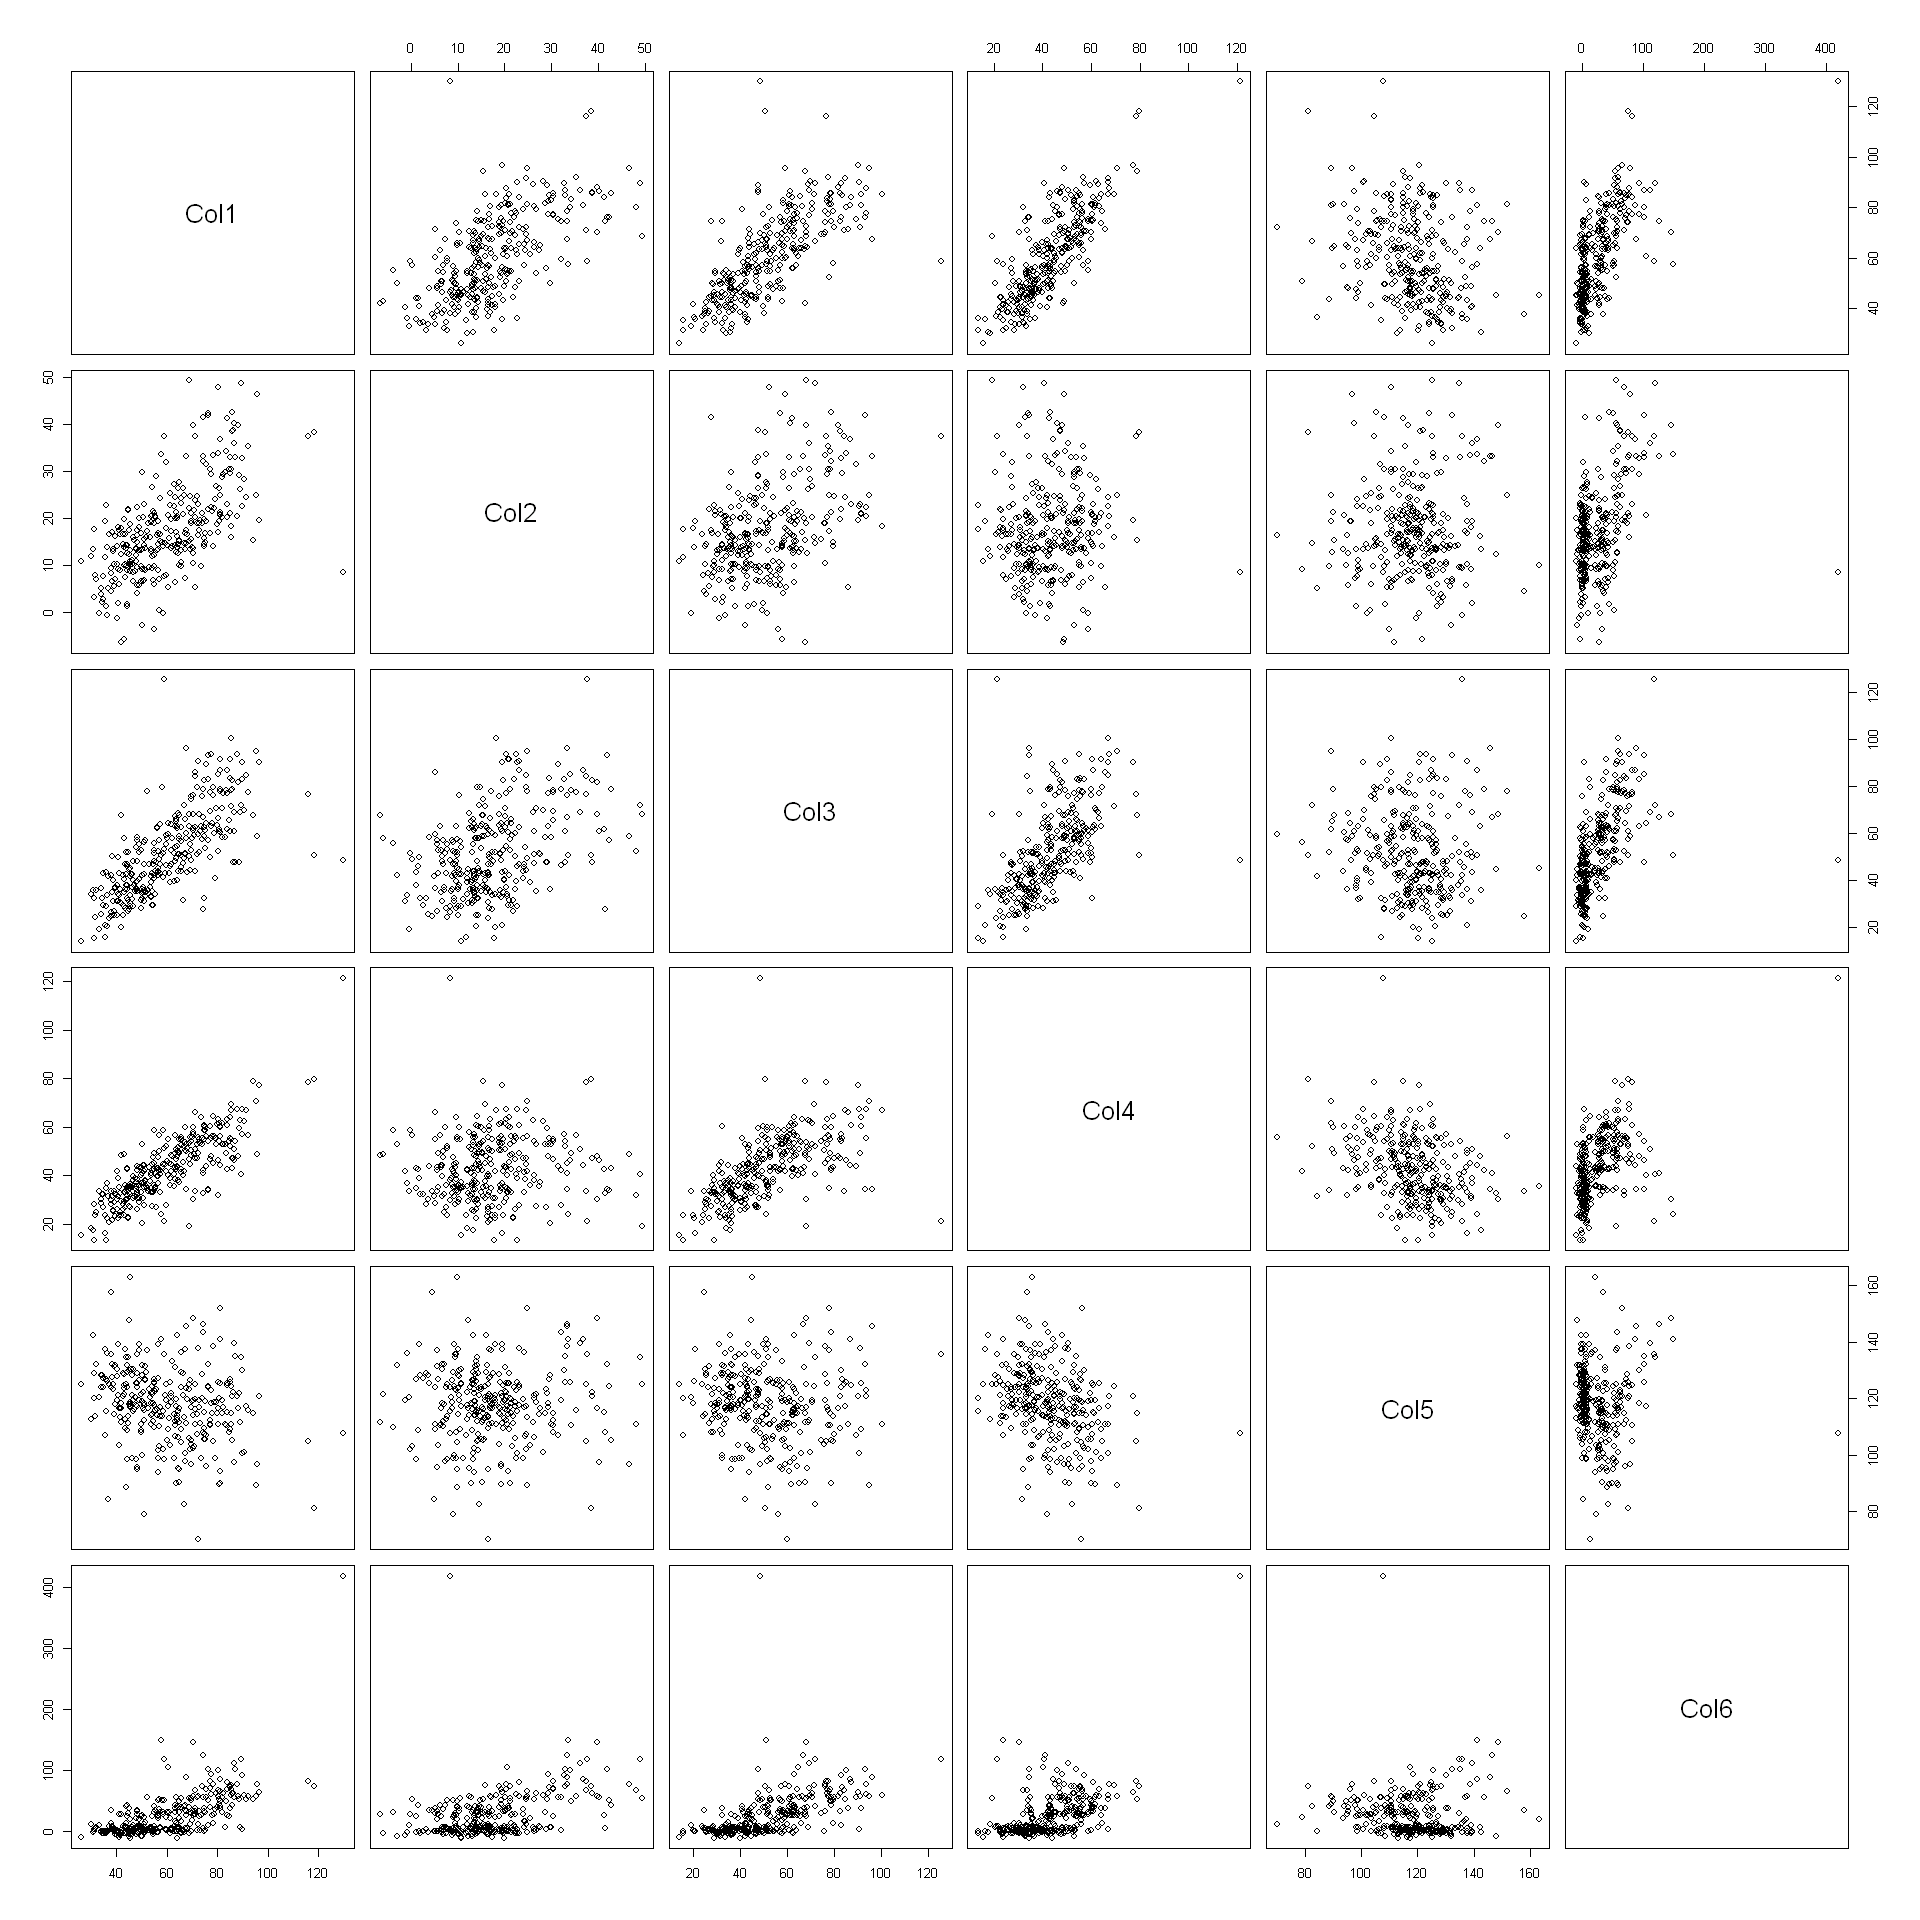

In [22]:
options(repr.plot.width=16, repr.plot.height=16) 

pairs(Dane[,-7])

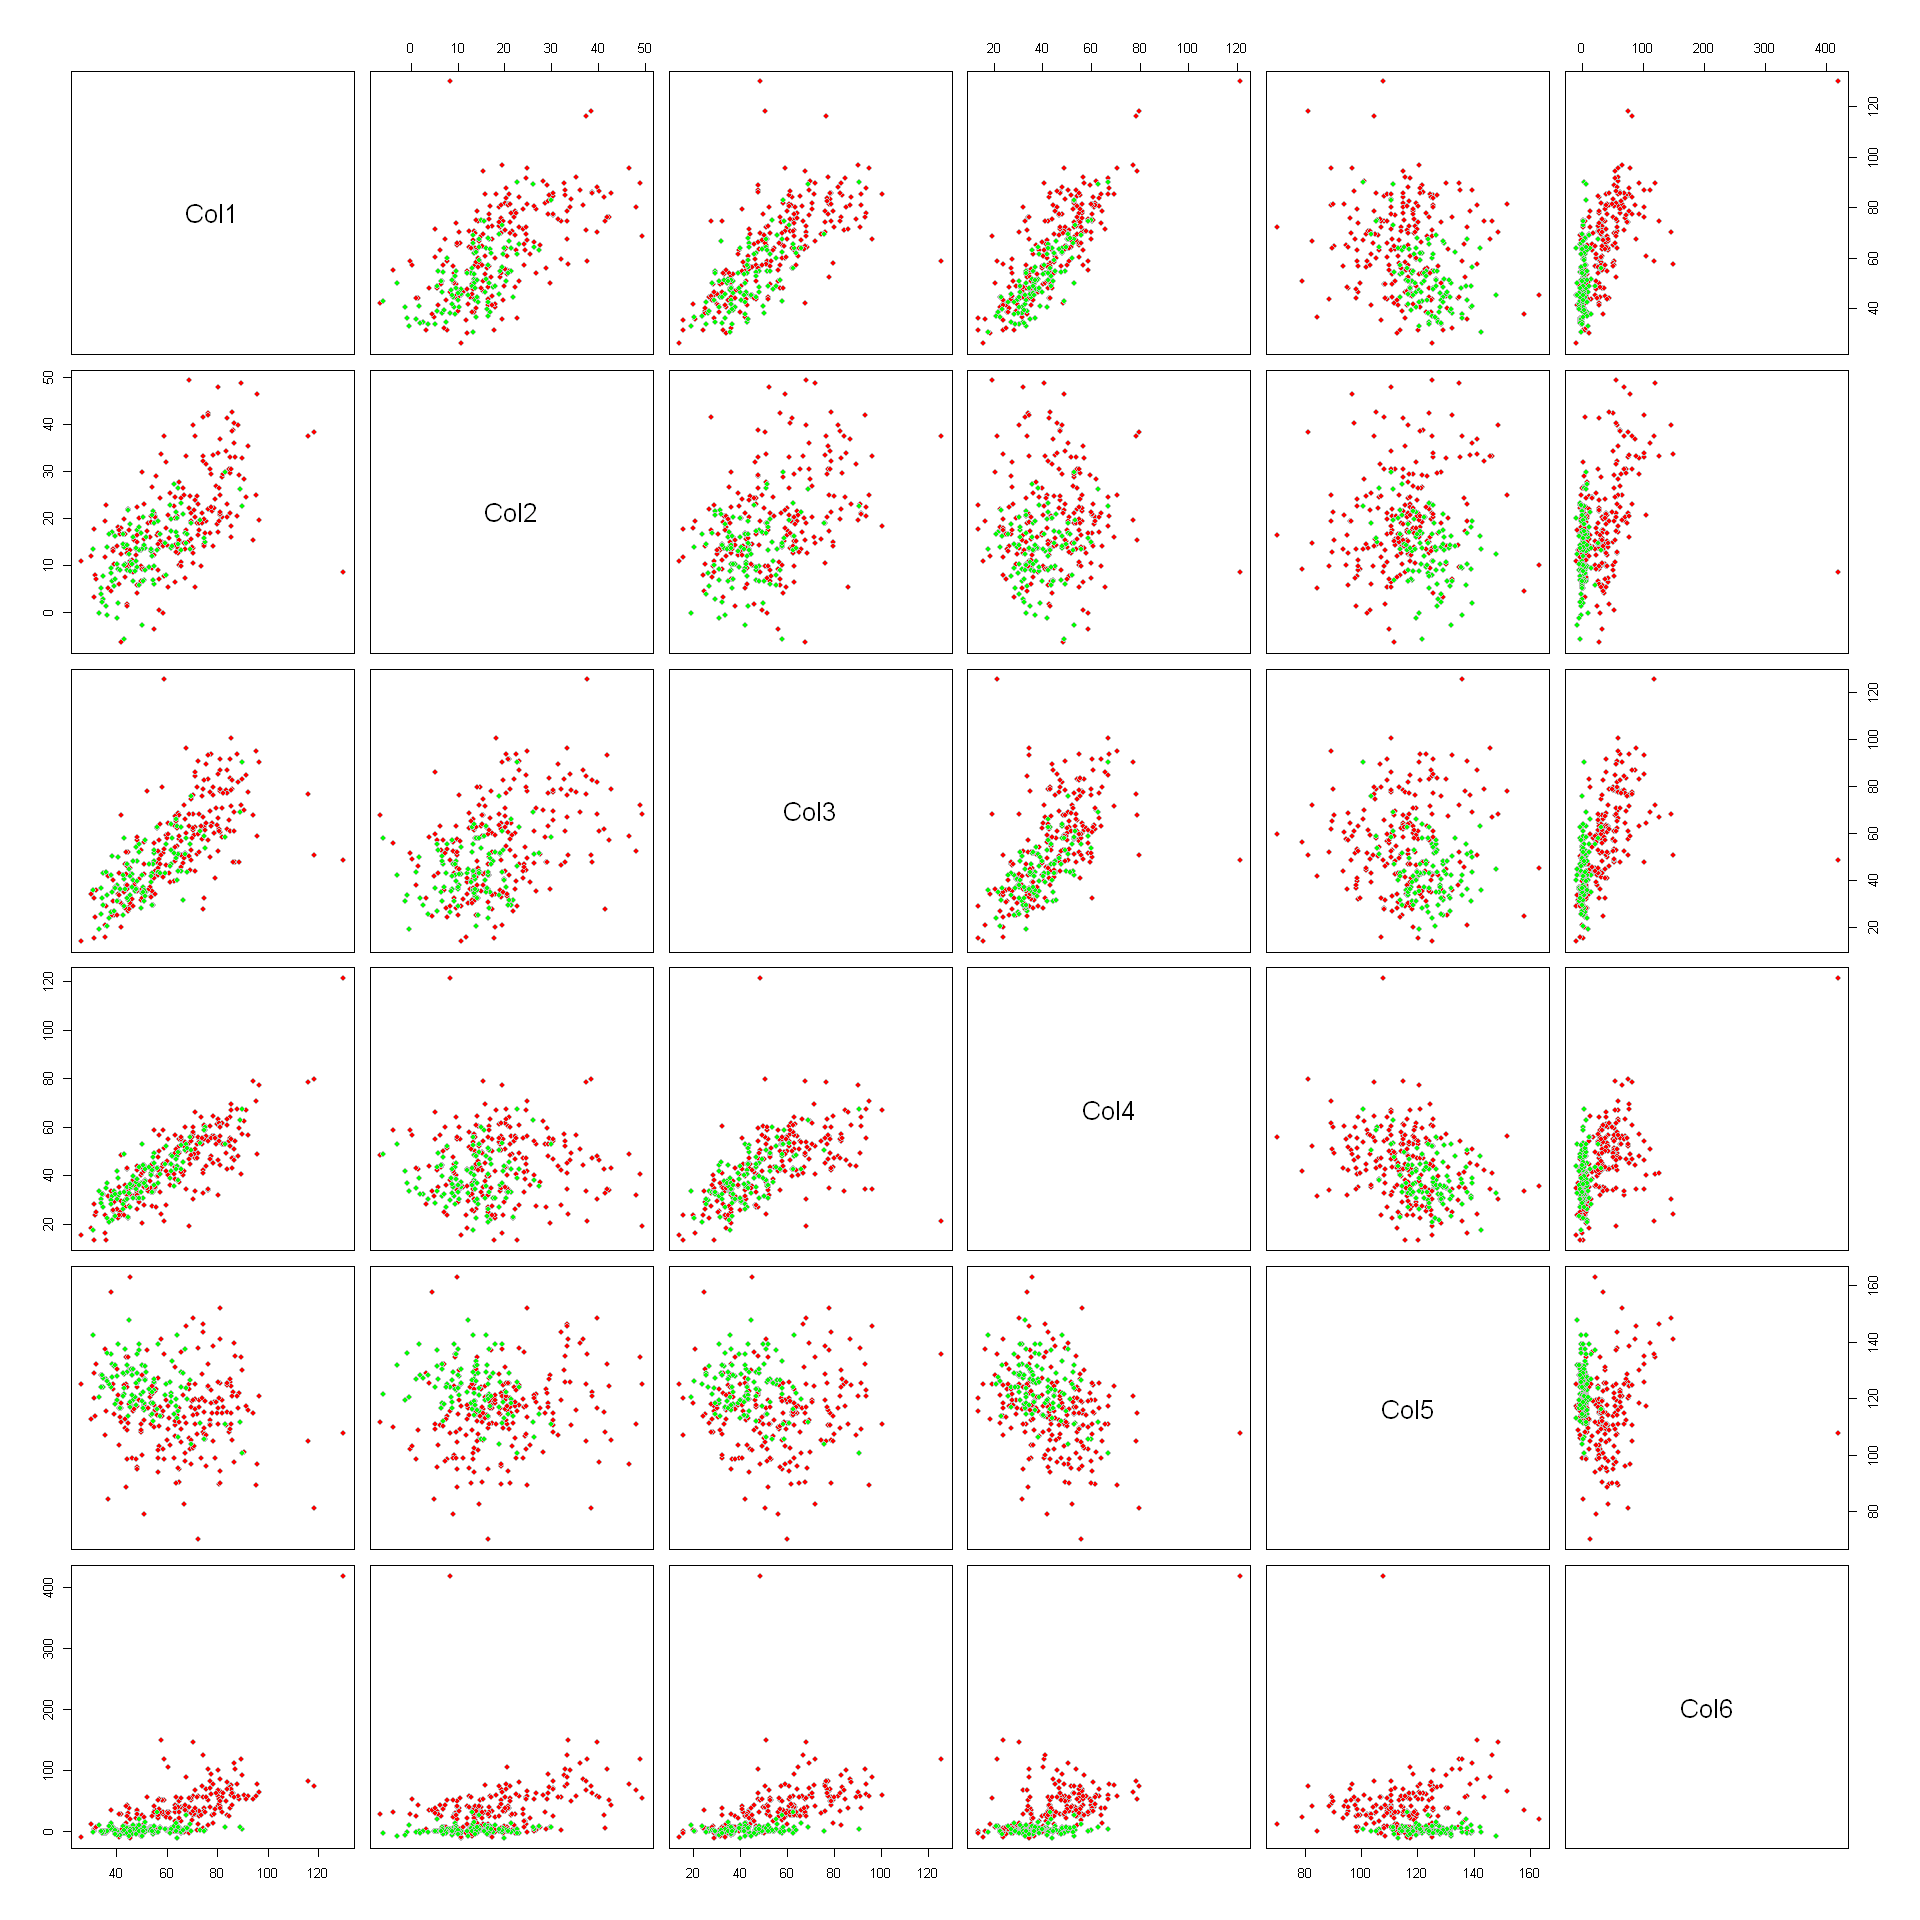

In [21]:
options(repr.plot.width=16, repr.plot.height=16) 

lookup <- c('Normal'  = 'green', 'Abnormal' = 'red')
col.ind <- lookup[Dane$Class_att]
pairs(Dane[,-7], pch = 21, col = "gray", bg = col.ind)


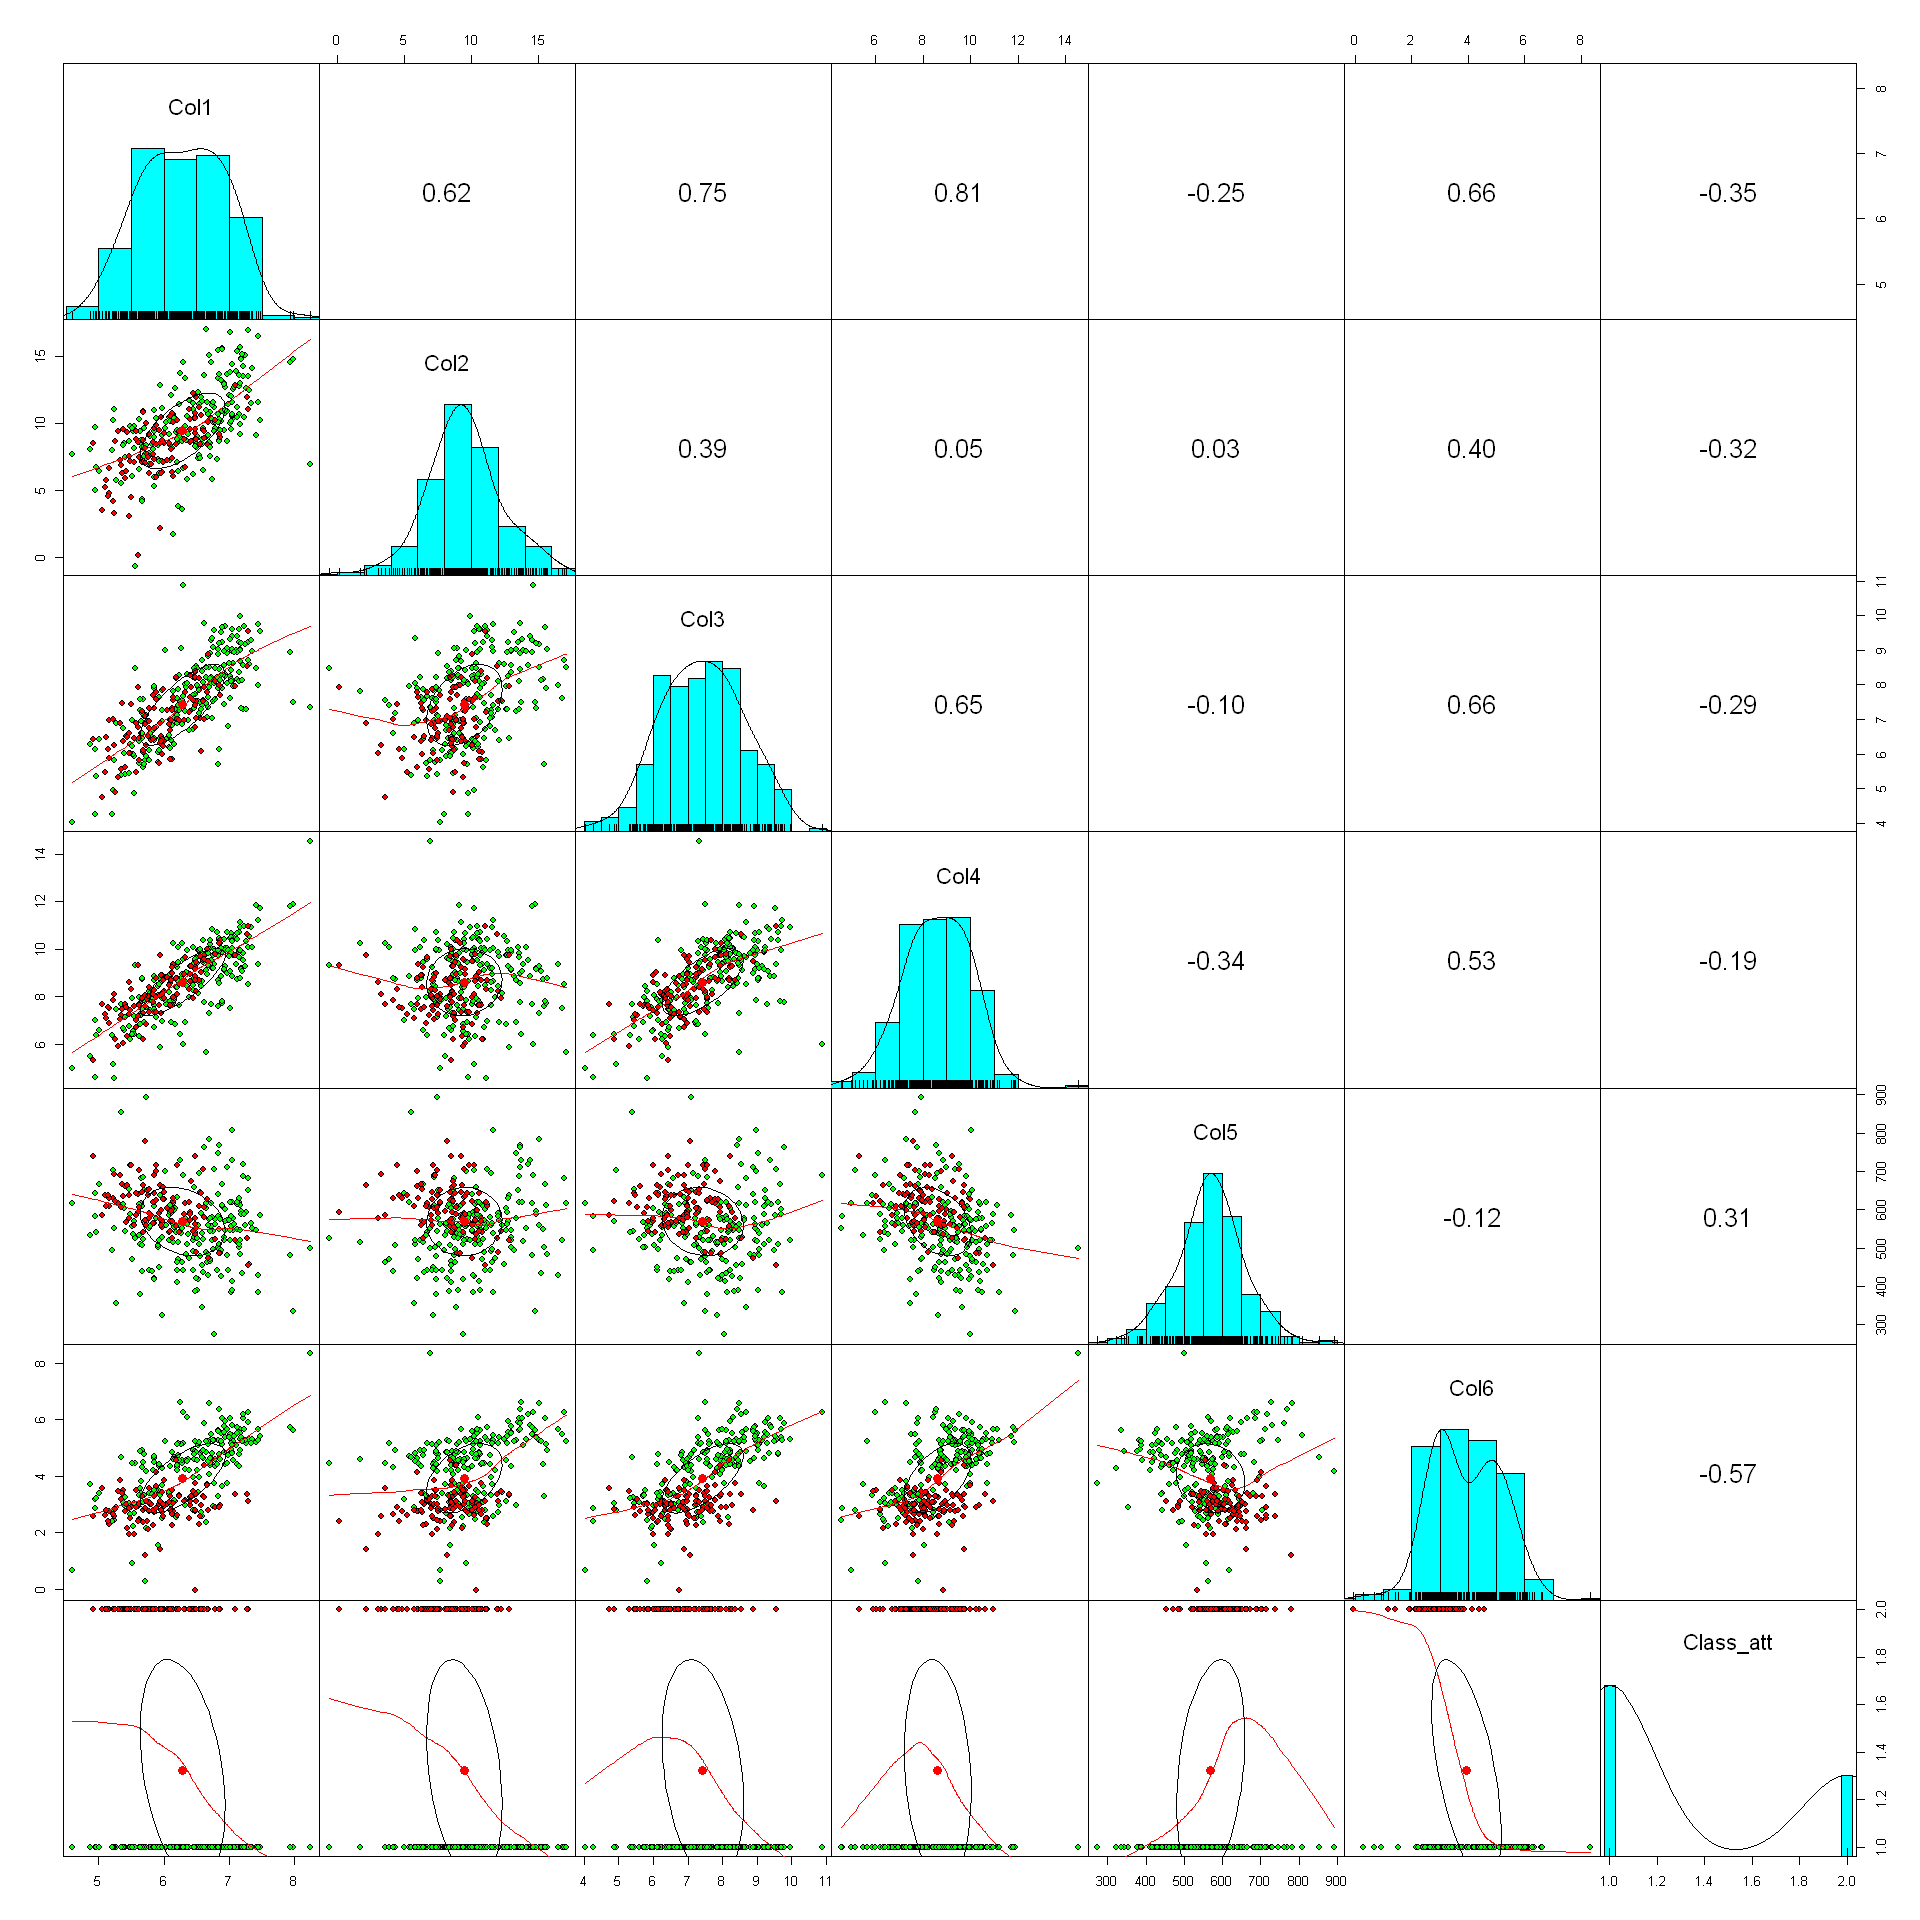

In [96]:
options(repr.plot.width=16, repr.plot.height=16) 

pairs.panels(Dane,
             gap = 0,
             bg = c('green', 'red')[as.numeric(as.factor(Dane$Class_att))],
             pch = 21)  # p

In [14]:
cor(Dane[, -7])

,Col1,Col2,Col3,Col4,Col5,Col6
Col1,1.0000000,0.62919877,0.71728236,0.81495999,-0.24746721,0.63874275
Col2,0.6291988,1.00000000,0.43276386,0.06234529,0.03266781,0.39786228
Col3,0.7172824,0.43276386,1.00000000,0.59838689,-0.08034361,0.53366701
Col4,0.8149600,0.06234529,0.59838689,1.00000000,-0.34212835,0.52355746
Col5,-0.2474672,0.03266781,-0.08034361,-0.34212835,1.00000000,-0.02606501
Col6,0.6387427,0.39786228,0.53366701,0.52355746,-0.02606501,1.00000000


## Bez normalizacji danych

### LDA

Warning message in lda.default(x, grouping, ...):
"zmienne są współliniowe"


Call:
lda(train$Class_att ~ ., data = train)

Prior probabilities of groups:
 Abnormal    Normal 
0.6576923 0.3423077 

Group means:
             Col1     Col2     Col3     Col4     Col5      Col6
Abnormal 64.20291 19.97616 55.09649 44.22675 115.0107 37.843091
Normal   51.47077 12.92230 42.92035 38.54847 123.7964  1.810108

Coefficients of linear discriminants:
             LD1
Col1  0.00758421
Col2 -0.03565669
Col3 -0.01711234
Col4  0.02955877
Col5  0.05841469
Col6 -0.02261666

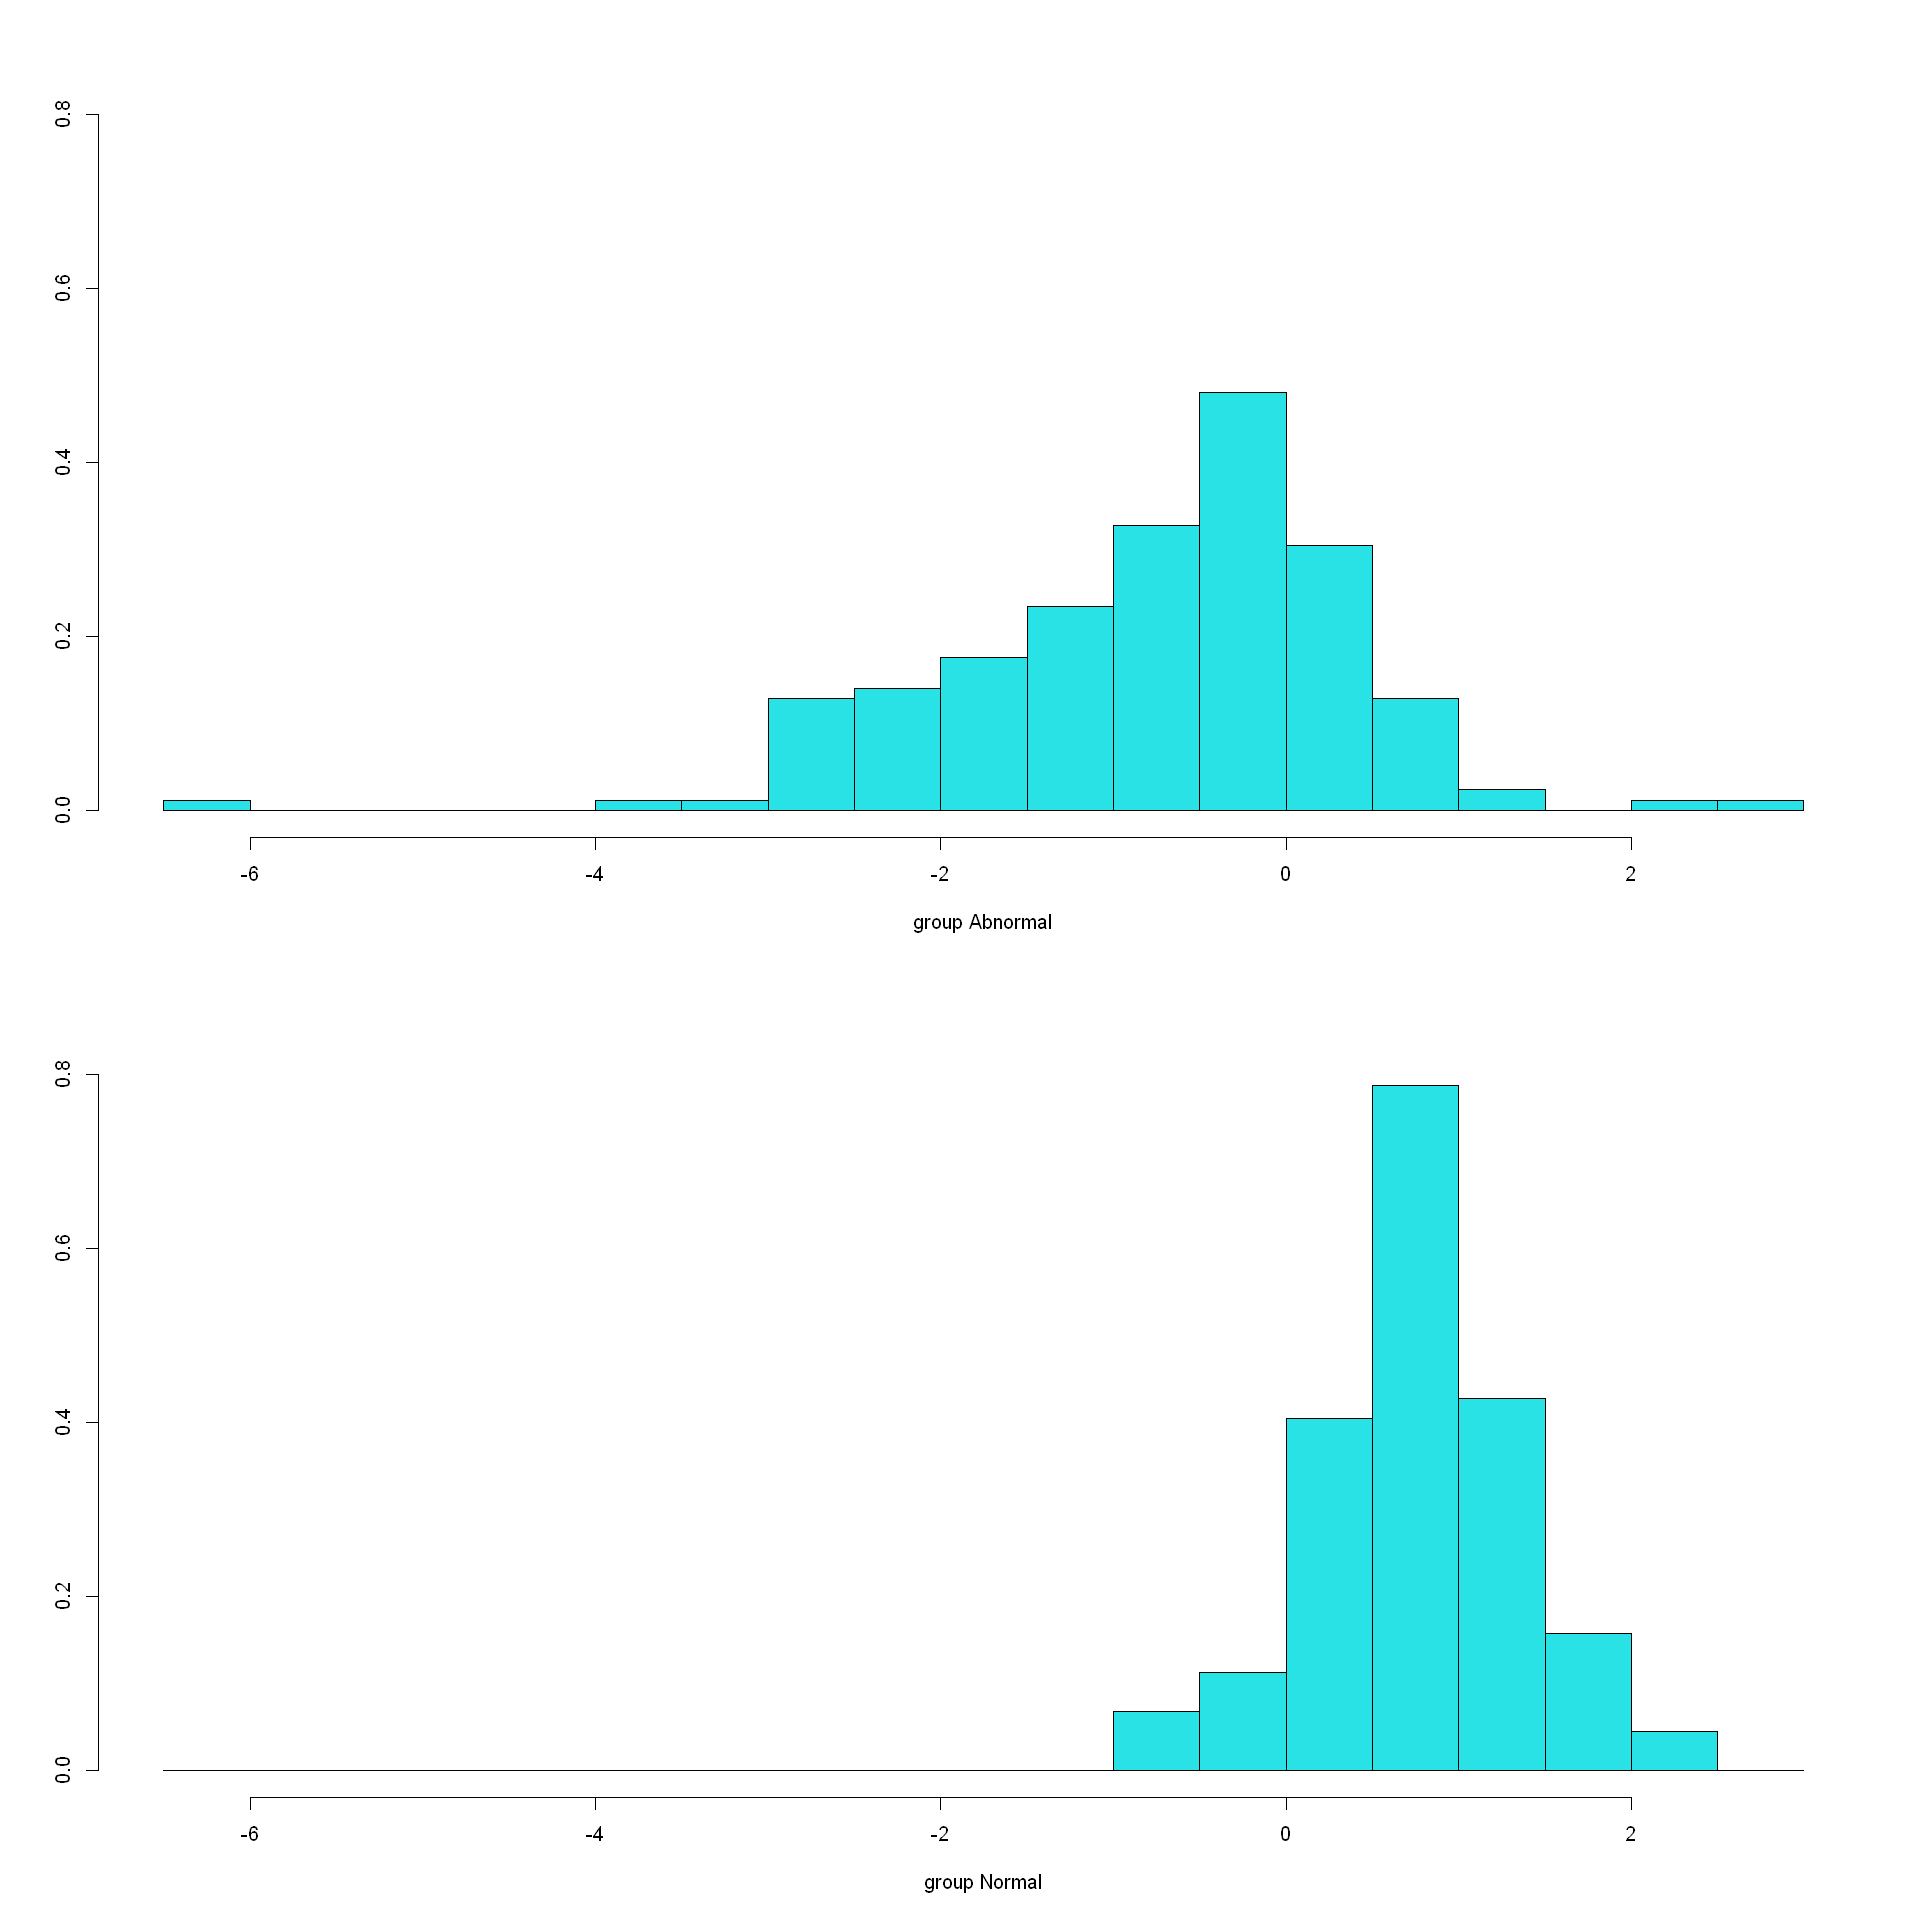

In [87]:
ind <- sample(310,50)
test <- Dane[ind,]
train <-Dane[-ind,]

lda.fit <- lda(train$Class_att~., data = train)
lda.fit
options(repr.plot.width=16, repr.plot.height=16) 

plot(lda.fit)

In [24]:
lda.pred <- predict(lda.fit, test)
lda.class <- lda.pred$class
table(lda.class, test[,7])
mean(lda.class == test[,7])


          
lda.class  Abnormal Normal
  Abnormal       23      6
  Normal          8     13

[1] 0.72

### QDA

In [132]:
pca_result <- prcomp(Dane[, -ncol(Dane)], center = TRUE, scale. = TRUE) 

pca_data <- data.frame(pca_result$x[, 1:2], Class = Dane$Class_att)  

(qda_model <- qda(Class ~ ., data = pca_data[-ind,]))

qda_predictions <- predict(qda_model, newdata = pca_data[ind,])

sum(qda_predictions$class == pca_data[ind,3])/length(qda_predictions$class)

Call:
qda(Class ~ ., data = pca_data[-ind, ])

Prior probabilities of groups:
 Abnormal    Normal 
0.6576923 0.3423077 

Group means:
                PC1          PC2
Abnormal -0.4758566 -0.002909816
Normal    1.1380899  0.057480791

[1] 0.74

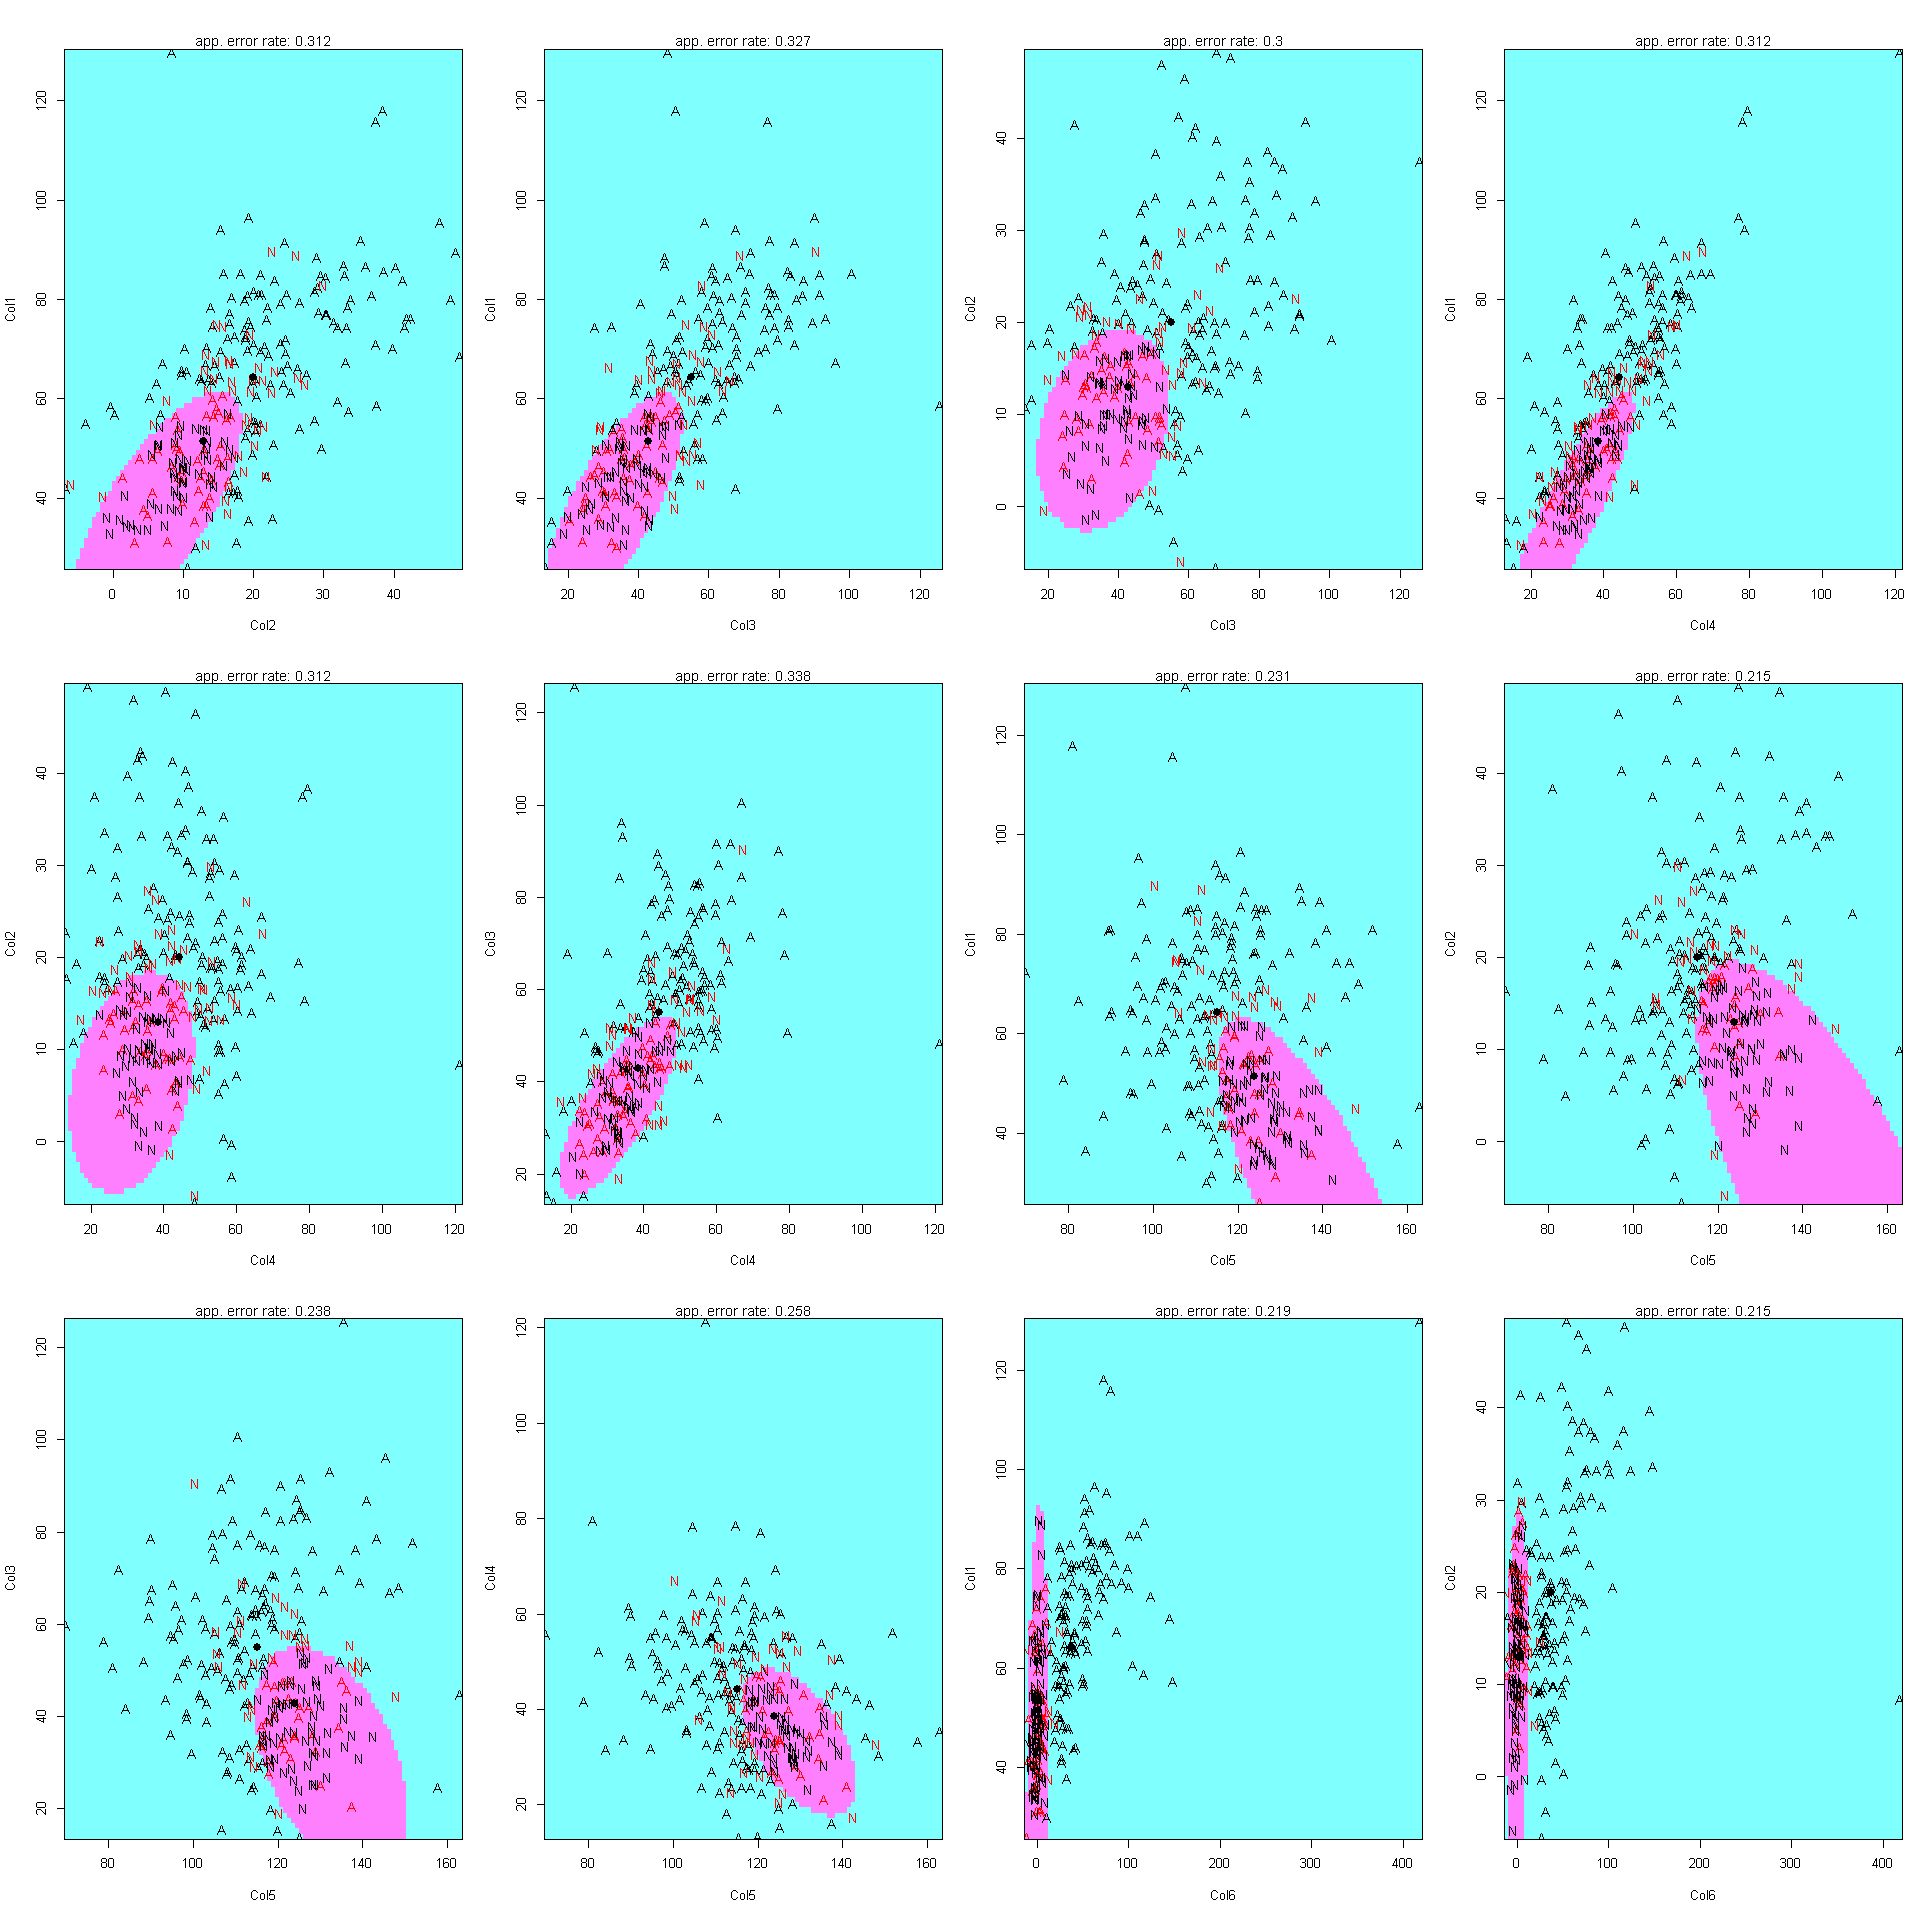

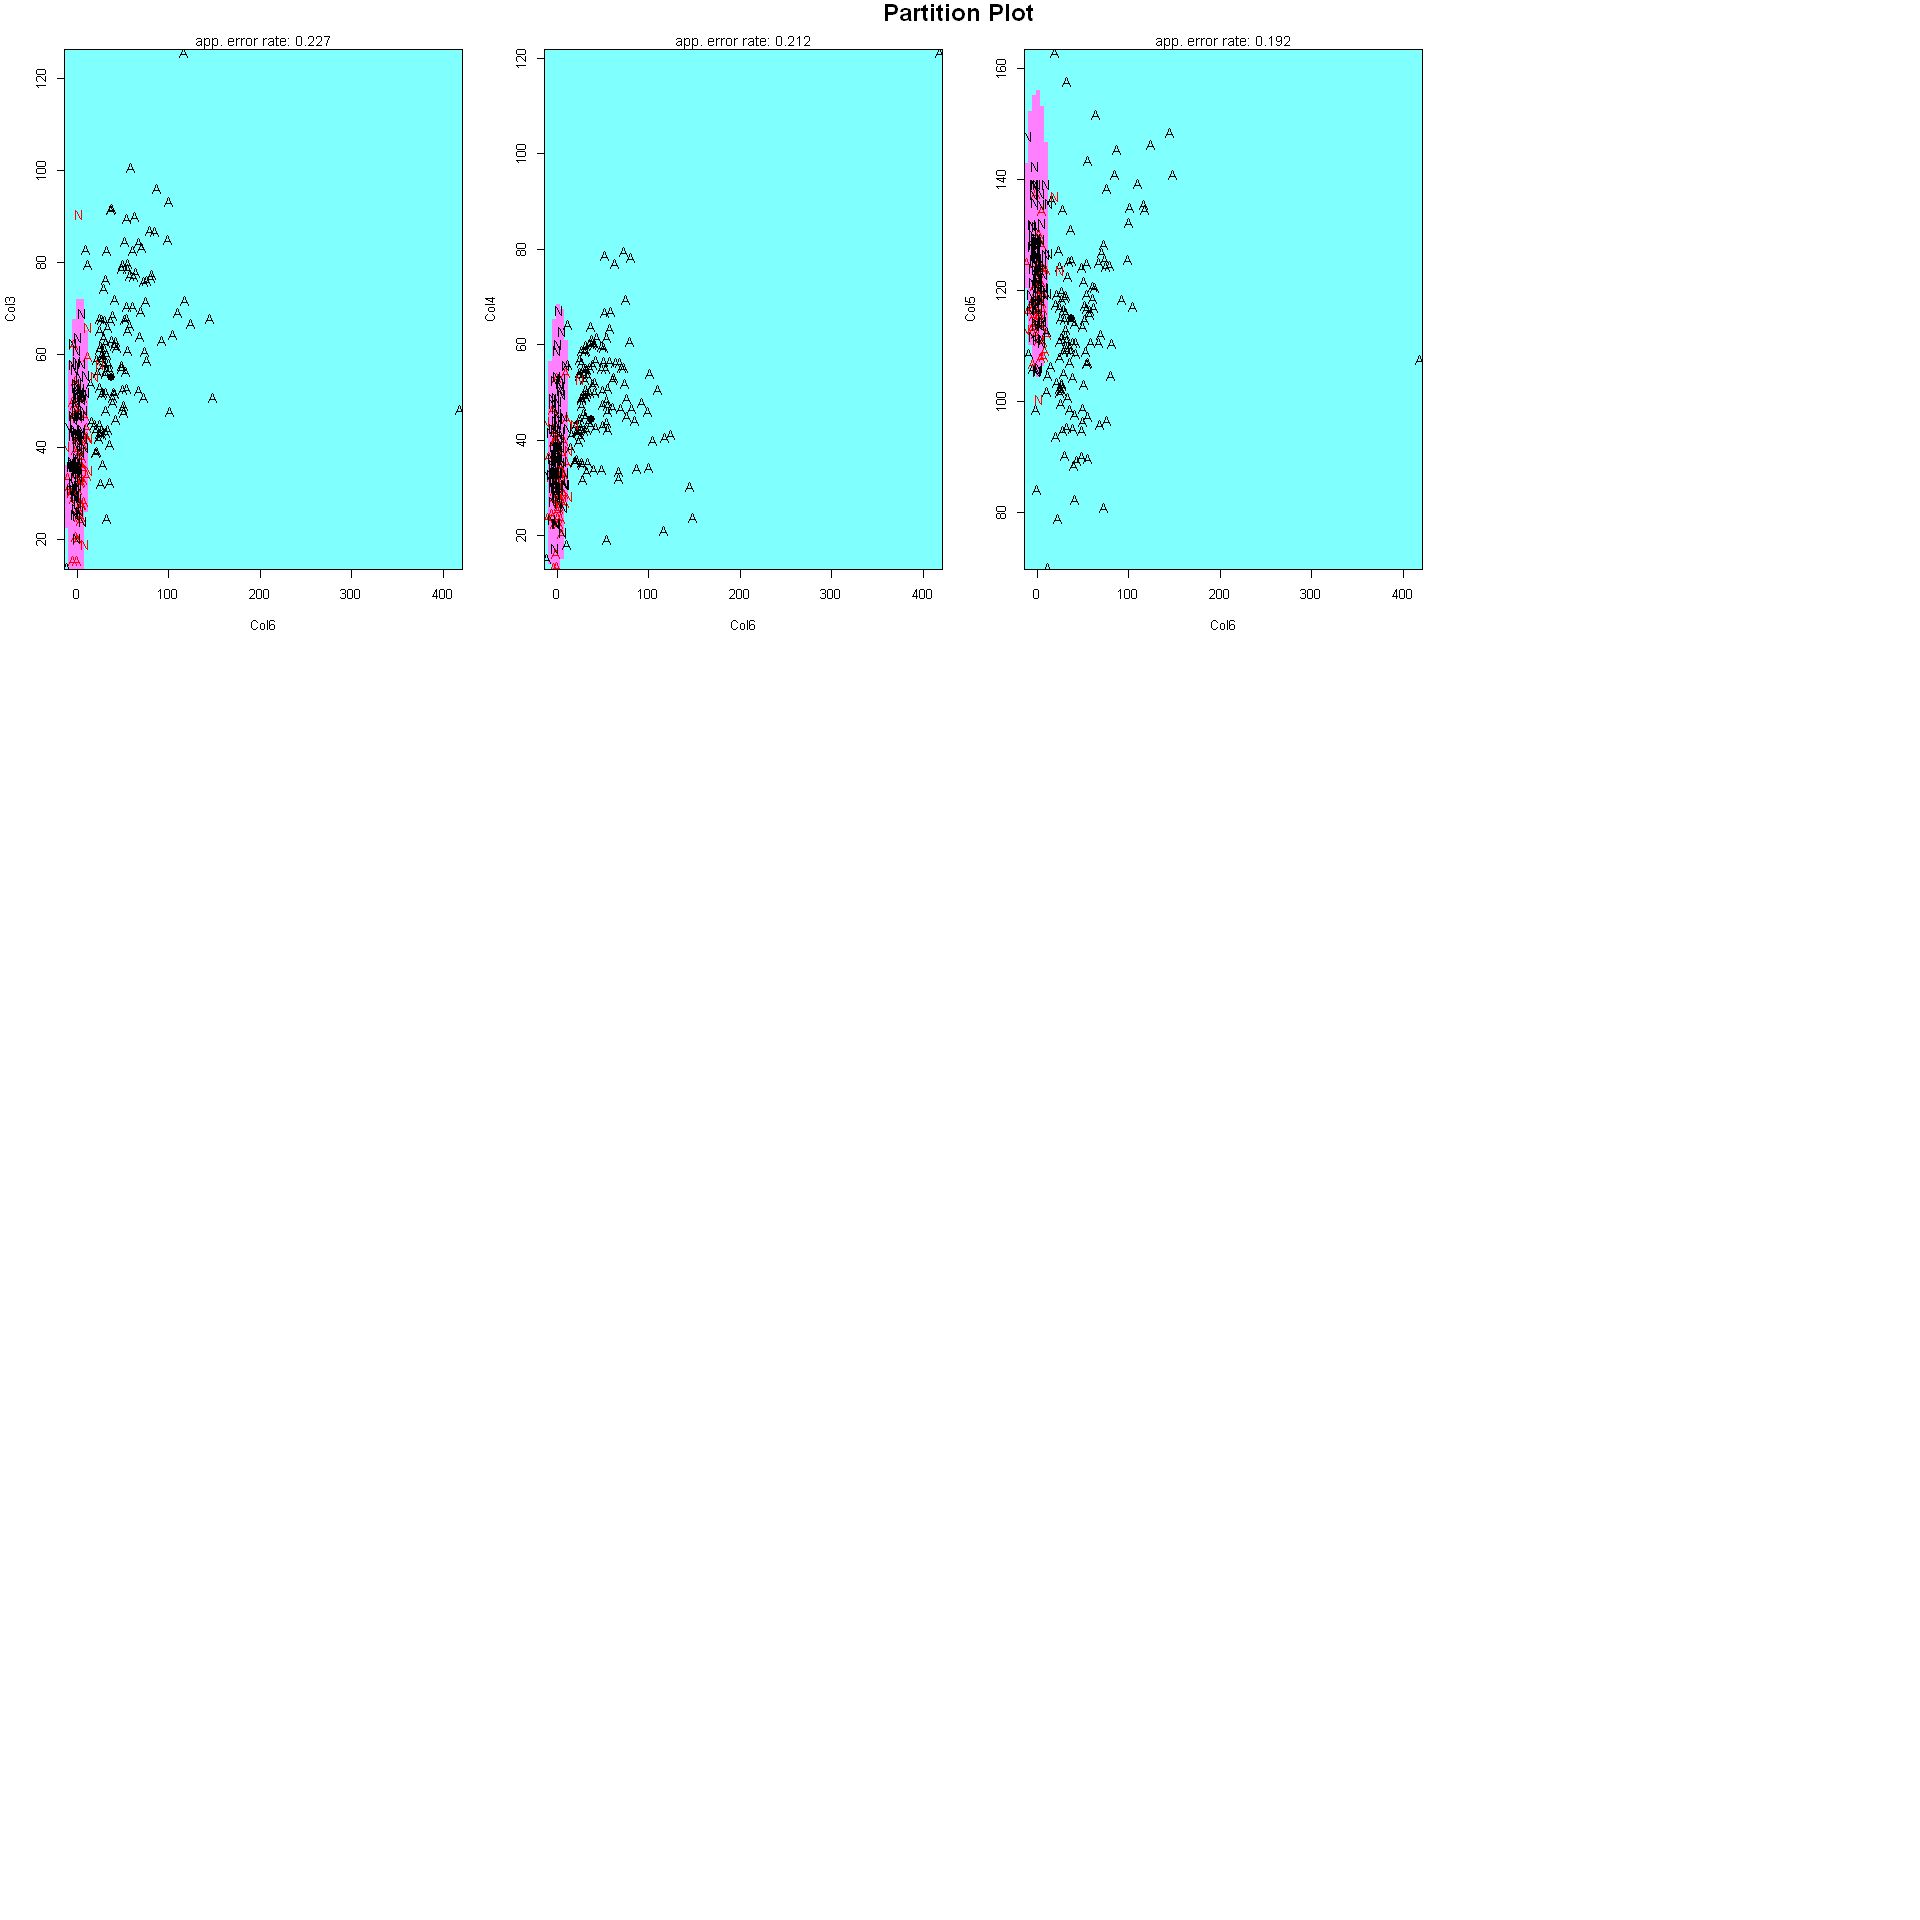

In [97]:
partimat(Class_att ~ ., data = train, method = "qda") # Dla QDA method = "qda"

## Normalność danych

In [50]:
summary(Dane)

      Col1            Col2             Col3             Col4       
 Min.   :4.794   Min.   :-6.555   Min.   : 14.00   Min.   : 13.37  
 1st Qu.:6.059   1st Qu.:10.667   1st Qu.: 37.00   1st Qu.: 33.35  
 Median :6.623   Median :16.358   Median : 49.56   Median : 42.40  
 Mean   :6.620   Mean   :17.543   Mean   : 51.93   Mean   : 42.95  
 3rd Qu.:7.171   3rd Qu.:22.120   3rd Qu.: 63.00   3rd Qu.: 52.70  
 Max.   :8.769   Max.   :49.432   Max.   :125.74   Max.   :121.43  
      Col5             Col6          Class_att        
 Min.   : 70.08   Min.   :-11.058   Length:310        
 1st Qu.:110.71   1st Qu.:  1.604   Class :character  
 Median :118.27   Median : 11.768   Mode  :character  
 Mean   :117.92   Mean   : 26.297                     
 3rd Qu.:125.47   3rd Qu.: 41.287                     
 Max.   :163.07   Max.   :418.543                     

In [134]:
Dane[,2]<-Dane[,2]+7
Dane[,6]<-Dane[,6]+12

In [59]:
summary(Dane)

      Col1             Col2              Col3             Col4       
 Min.   : 26.15   Min.   : 0.4451   Min.   : 14.00   Min.   : 13.37  
 1st Qu.: 46.43   1st Qu.:17.6671   1st Qu.: 37.00   1st Qu.: 33.35  
 Median : 58.69   Median :23.3577   Median : 49.56   Median : 42.40  
 Mean   : 60.50   Mean   :24.5428   Mean   : 51.93   Mean   : 42.95  
 3rd Qu.: 72.88   3rd Qu.:29.1204   3rd Qu.: 63.00   3rd Qu.: 52.70  
 Max.   :129.83   Max.   :56.4319   Max.   :125.74   Max.   :121.43  
      Col5             Col6           Class_att        
 Min.   : 70.08   Min.   :  0.9418   Length:310        
 1st Qu.:110.71   1st Qu.: 13.6037   Class :character  
 Median :118.27   Median : 23.7679   Mode  :character  
 Mean   :117.92   Mean   : 38.2967                     
 3rd Qu.:125.47   3rd Qu.: 53.2874                     
 Max.   :163.07   Max.   :430.5431                     

In [135]:
for (i in c(1:6)){
    BC <- boxcox(Dane[,i]~1,plotit=FALSE)
    BC$x[which.max(BC$y)]

    lambda <- BC$x[which.max(BC$y)]
    Dane[,i] <- if(lambda == 0) log(Dane[,i]) else (Dane[,i]^lambda - 1) / lambda
    shapiro.test(Dane[,i])
}

## Na znormalizowanych danych

### LDA

Call:
lda(train$Class_att ~ ., data = train)

Prior probabilities of groups:
 Abnormal    Normal 
0.6769231 0.3230769 

Group means:
             Col1      Col2     Col3     Col4     Col5     Col6
Abnormal 6.448095 10.159927 7.626029 8.793496 550.0960 4.405792
Normal   5.897455  7.911778 6.844559 8.159676 614.0447 2.893964

Coefficients of linear discriminants:
              LD1
Col1 -1.850781549
Col2  0.156271506
Col3  0.109111093
Col4  0.928627642
Col5  0.006880233
Col6 -1.004296755

          
lda.class  Abnormal Normal
  Abnormal       30      6
  Normal          4     10

[1] 0.8

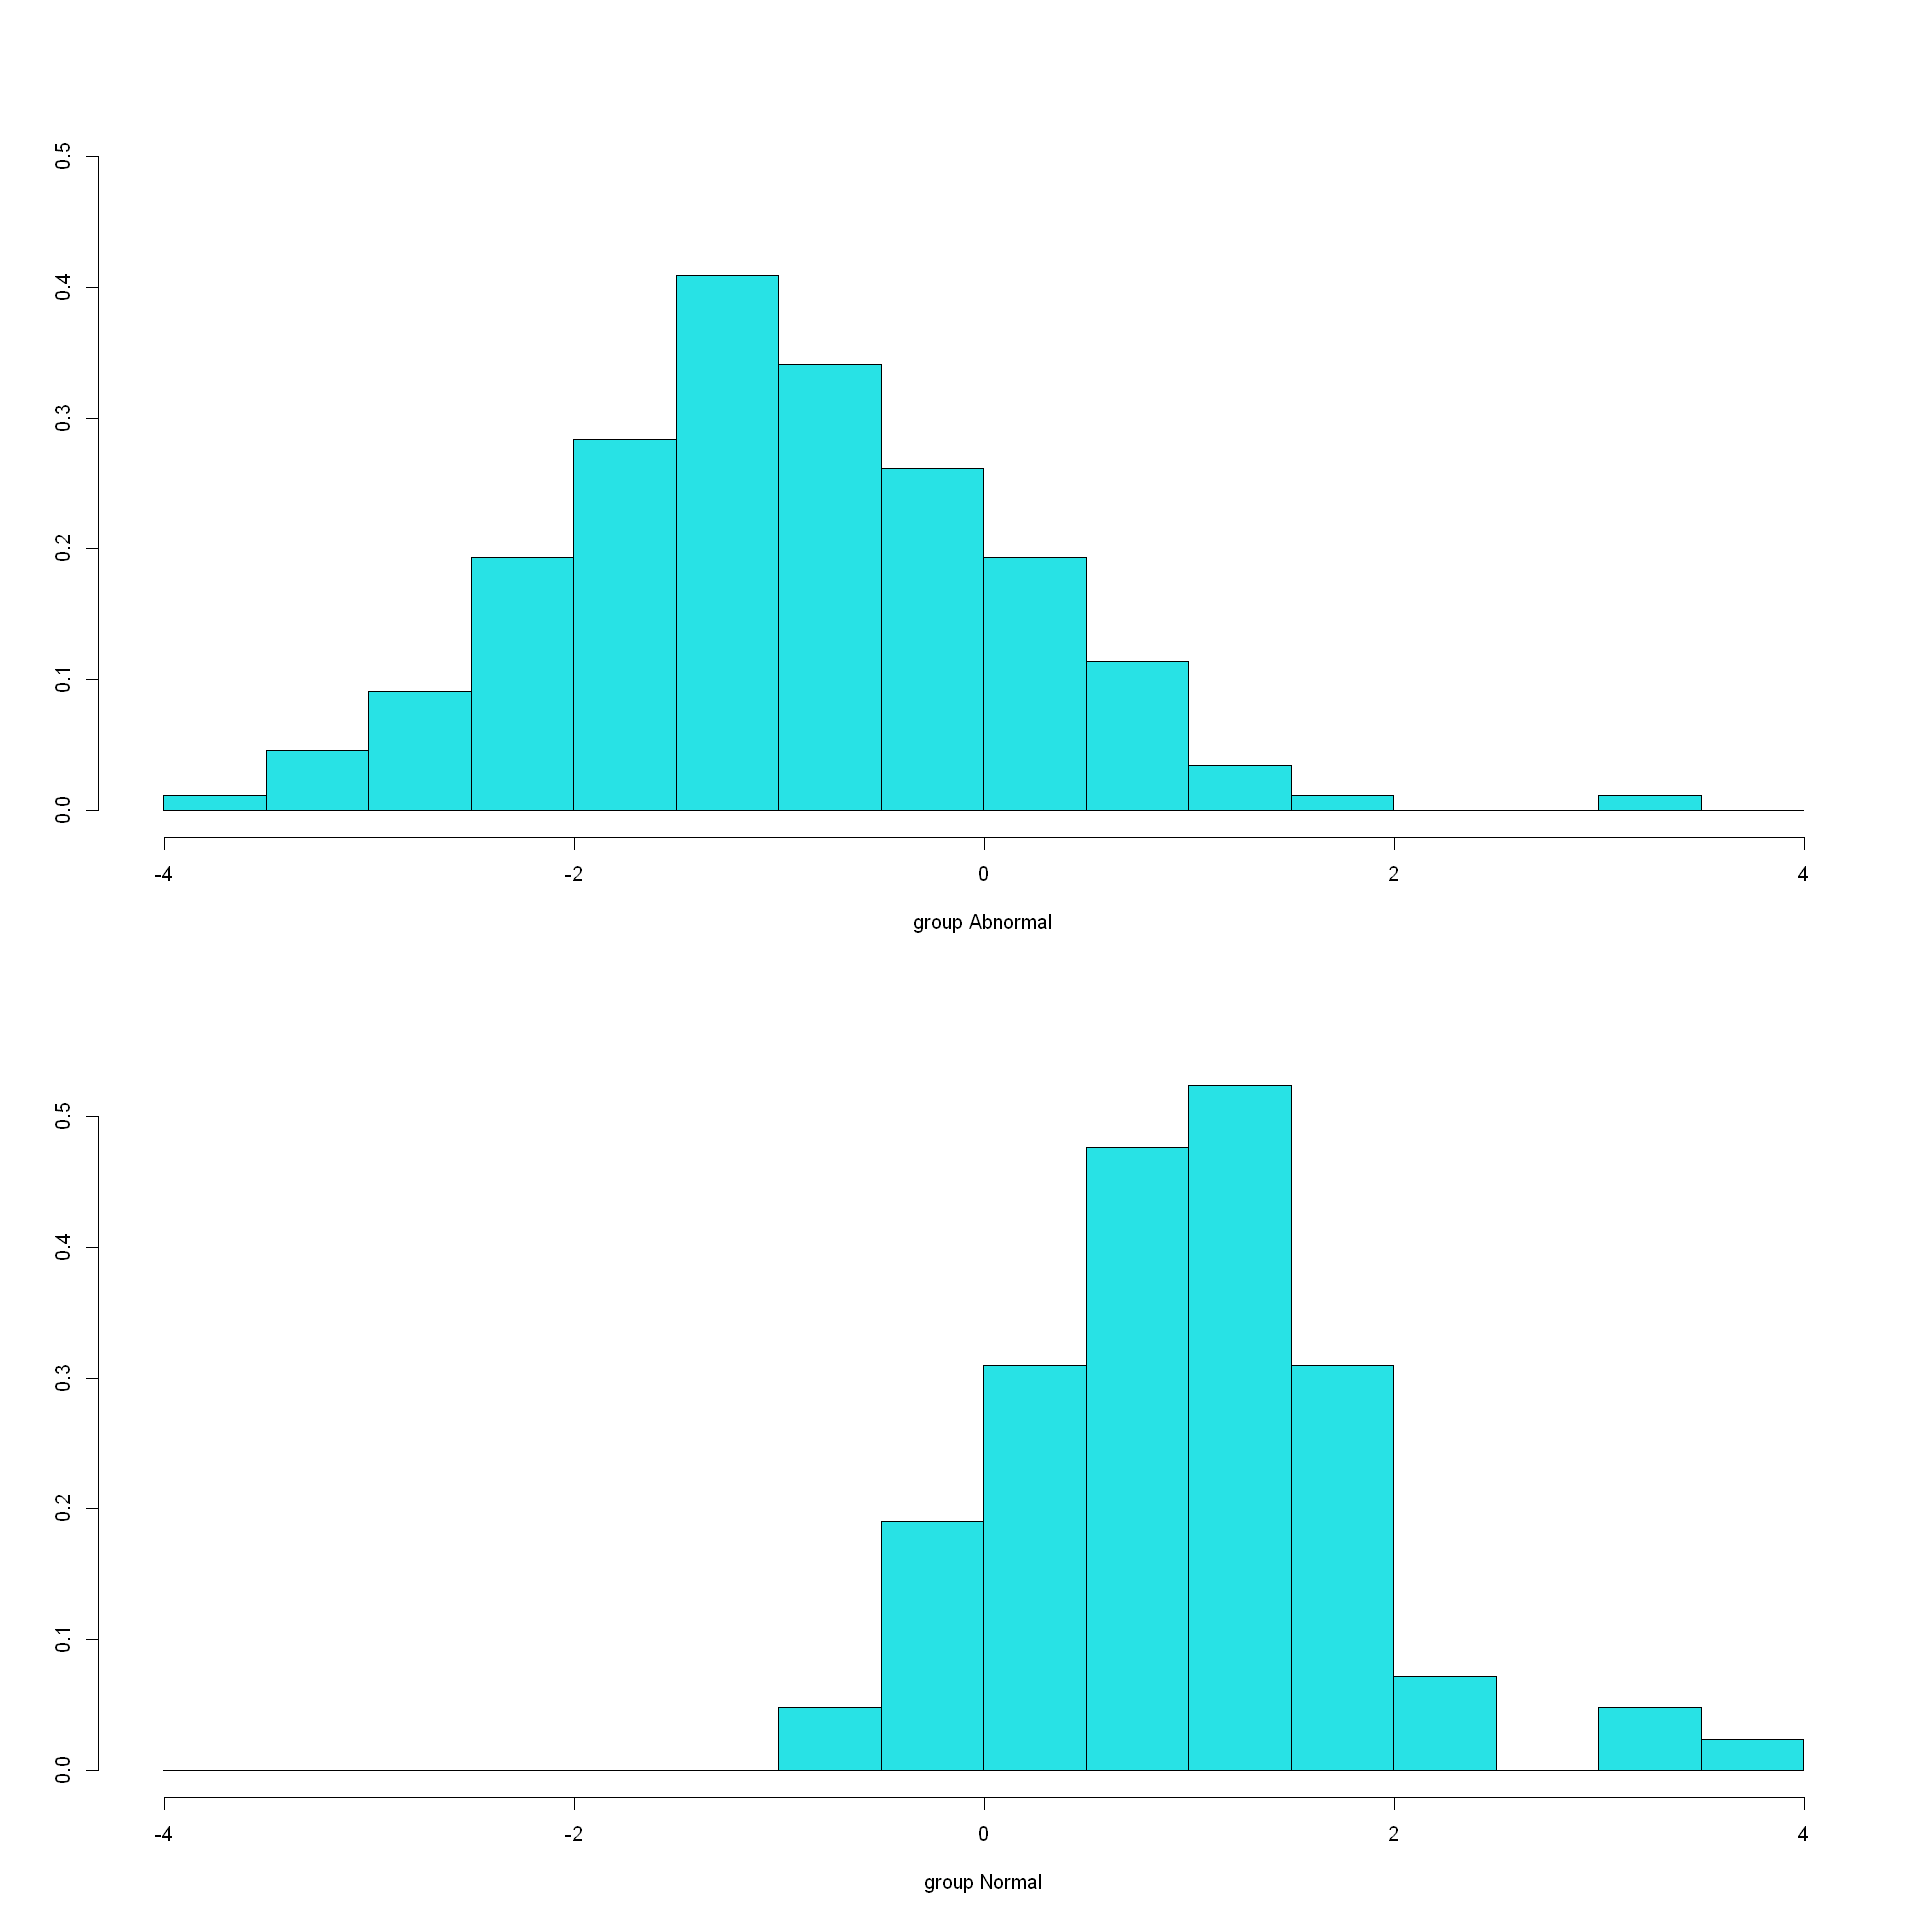

In [62]:
ind <- sample(310,50)
test <- Dane[ind,]
train <-Dane[-ind,]

lda.fit <- lda(train$Class_att~., data = train)
lda.fit
options(repr.plot.width=16, repr.plot.height=16) 

plot(lda.fit)

lda.pred <- predict(lda.fit, test)
lda.class <- lda.pred$class
table(lda.class, test[,7])
mean(lda.class == test[,7])


### QDA

In [136]:
pca_result <- prcomp(Dane[, -ncol(Dane)], center = TRUE, scale. = TRUE) 

pca_data <- data.frame(pca_result$x[, 1:2], Class = Dane$Class_att)  

(qda_model <- qda(Class ~ ., data = pca_data[-ind,]))

qda_predictions <- predict(qda_model, newdata = pca_data[ind,])

sum(qda_predictions$class == pca_data[ind,3])/length(qda_predictions$class)

Call:
qda(Class ~ ., data = pca_data[-ind, ])

Prior probabilities of groups:
 Abnormal    Normal 
0.6576923 0.3423077 

Group means:
                PC1         PC2
Abnormal -0.4875471 0.020697783
Normal    1.1974810 0.006574791

[1] 0.72

### MDA

In [77]:
(mda_model <- mda(train$Class_att ~ ., data = train))
mda_predictions <- predict(mda_model, test)
table <- table(Predicted = mda_predictions, Actual = test$Class_att)
table
(table[1,1]+table[2,2])/sum(table)

Call:
mda(formula = train$Class_att ~ ., data = train)

Dimension: 5 

Percent Between-Group Variance Explained:
    v1     v2     v3     v4     v5 
 70.74  95.63  99.40  99.99 100.00 

Degrees of Freedom (per dimension): 7 

Training Misclassification Error: 0.13462 ( N = 260 )

Deviance: 156.128 

          Actual
Predicted  Abnormal Normal
  Abnormal       29      6
  Normal          5     10

[1] 0.78

### RDA

In [80]:
(rda.fit <- rda(train$Class_att ~ ., data = train))

Call: 
rda(formula = train$Class_att ~ ., data = train)

Regularization parameters: 
    gamma    lambda 
0.6524665 0.9461860 

Prior probabilities of groups: 
 Abnormal    Normal 
0.6769231 0.3230769 

Misclassification rate: 
       apparent: 27.692 %
cross-validated: 27.254 %

### FDA

In [78]:
fda_model <- fda(train$Class_att ~ ., data = train)
fda_predictions <- predict(fda_model, test)
table<- table(Predicted = fda_predictions, Actual = test$Class_att)
table
(table[1,1]+table[2,2])/sum(table)

          Actual
Predicted  Abnormal Normal
  Abnormal       30      6
  Normal          4     10

[1] 0.8